In [1]:
import pandas as pd

In [10]:
df = pd.read_csv('../../datasets/telco_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# Convertimos genero en datos categoricos
df['gender_cat'] = df.gender.astype('category')
df.gender_cat.dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [16]:
# Extraemos los codigos categoricos utilizando pandas.cat.codes
df.gender_cat = df.gender_cat.cat.codes
df.gender_cat


0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender_cat, Length: 7043, dtype: int8

In [17]:
# Repetimos este proceso para las columnas categoricas restantes
df['PaperlessBilling_cat'] = df.PaperlessBilling.astype('category')
df.PaperlessBilling_cat = df.PaperlessBilling_cat.cat.codes

df['Contract_cat'] = df.Contract.astype('category')
df.Contract_cat = df.Contract_cat.cat.codes

df['PaymentMethod_cat'] = df.PaymentMethod.astype('category')
df.PaymentMethod_cat = df.PaymentMethod_cat.cat.codes

df['Partner_cat'] = df.Partner.astype('category')
df.Partner_cat = df.Partner_cat.cat.codes

df['Dependents_cat'] = df.Dependents.astype('category')
df.Dependents_cat = df.Dependents_cat.cat.codes

df['DeviceProtection_cat'] = df.DeviceProtection.astype('category')
df.DeviceProtection_cat = df.DeviceProtection_cat.cat.codes

In [18]:
import numpy as np

In [40]:
# creamos una columna codificada para churn 1, 0
df['Churn_score'] = np.where(df.Churn == 'Yes', 1, 0)
df.Churn_score 

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_score, Length: 7043, dtype: int32

In [22]:
# Creamos el dataset para el modelo
columnas = ['tenure','MonthlyCharges','gender_cat','PaperlessBilling_cat','Contract_cat','PaymentMethod_cat','Partner_cat','Dependents_cat','DeviceProtection_cat' ]
X = df[columnas]
# Asignamos la variable dependiente
y = df.Churn_score

In [41]:
y.value_counts()

0    5174
1    1869
Name: Churn_score, dtype: int64

In [36]:
X.head()

,tenure,MonthlyCharges,gender_cat,PaperlessBilling_cat,Contract_cat,PaymentMethod_cat,Partner_cat,Dependents_cat,DeviceProtection_cat
0,1,29.85,0,1,0,2,1,0,0
1,34,56.95,1,0,1,3,0,0,2
2,2,53.85,1,1,0,3,0,0,0
3,45,42.30,1,0,1,0,0,0,2
4,2,70.70,0,1,0,2,0,0,0


In [29]:
# Importamos sklearn train_test_split
from sklearn.model_selection import train_test_split

In [37]:

# Hacemos las particioenes de la data para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
# Escalamos X_train ya que sobrepasa el limite de iterations permitidas por el modelo
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [49]:
from sklearn.linear_model import LogisticRegression
# Importamos el modelo de regresión logistica LogisticRegression
logistic_regression_model = LogisticRegression()
# Entrenamos el modelo
logistic_regression_model.fit(X_scaled, y_train)

LogisticRegression()

In [50]:
# Generamos predicciones
y_pred = logistic_regression_model.predict(X_test)

In [53]:
# Generamos una matrix de confusión para validar el performance del modelo
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test, y_pred)

In [59]:
val = np.mat(conmat)
classnames = list(set(y_train))
df_cm = pd.DataFrame(
    val, index=classnames, columns=classnames
)
df_cm.head()

,0,1
0,271,748
1,13,377


In [62]:
df_cm = df_cm.astype('float') / np.array(df_cm.sum(axis=1))

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

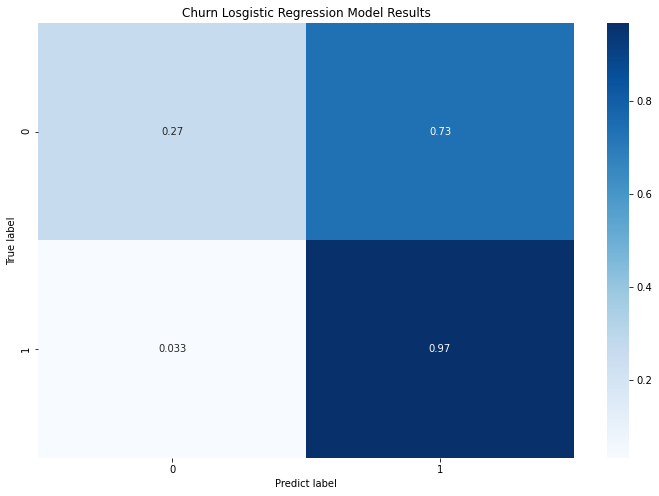

In [71]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predict label')
plt.title('Churn Losgistic Regression Model Results')
plt.show()

In [74]:
from sklearn.inspection import plot_partial_dependence
features = [0, 1, (1,0)]
plot_partial_dependence(logistic_regression_model, X_scaled, features, target=1)

TypeError: plot_partial_dependence() got an unexpected keyword argument 'traget'